In [1]:
import time
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

C:\Users\nirun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\nirun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\nirun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\nirun\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
from sklearn.model_selection import train_test_split

### Define layer function

In [6]:
def layer_sigmoid(x, weight_shape, bias_shape):
    
    w_std = (2.0/weight_shape[0])**0.5

    w_0 = tf.random_normal_initializer(stddev=w_std)
    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    return tf.nn.sigmoid(tf.matmul(x, W) + b)

def layer_relu(x, weight_shape, bias_shape):
    
    w_std = (2.0/weight_shape[0])**0.5

    w_0 = tf.random_normal_initializer(stddev=w_std)
    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    return tf.nn.relu(tf.matmul(x, W) + b)

def layer_tanh(x, weight_shape, bias_shape):
    
    w_std = (2.0/weight_shape[0])**0.5

    w_0 = tf.random_normal_initializer(stddev=w_std)
    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    return tf.nn.tanh(tf.matmul(x, W) + b)

def layer_lrelu(x, weight_shape, bias_shape):
    
    w_std = (2.0/weight_shape[0])**0.5

    w_0 = tf.random_normal_initializer(stddev=w_std)
    b_0 = tf.constant_initializer(value=0)
    
    W = tf.get_variable("W", weight_shape, initializer=w_0)
    b = tf.get_variable("b", bias_shape,   initializer=b_0)
    
    print('Weight Matrix:', W)
    print('Bias Vector:', b)
    
    return tf.nn.leaky_relu(tf.matmul(x, W) + b)

def loss_2(output, y):

    #Computes softmax cross entropy between logits and labels.
    xentropy = tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=y)
    loss = tf.reduce_mean(xentropy)

    return loss

def training(cost, global_step):

    tf.summary.scalar("cost", cost)

    optimizer = tf.train.RMSPropOptimizer(learning_rate)
    train_op = optimizer.minimize(cost, global_step=global_step)

    return train_op

def evaluate(output, y):
    
    correct_prediction = tf.equal(tf.argmax(output, 1), tf.argmax(y, 1))
    
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    tf.summary.scalar("validation_error", (1.0 - accuracy))

    return accuracy

### Define inference function

In [7]:
def inference_1(x):
    """
    define the whole network (2 hidden layers + output layers)
    input:
        - a batch of pictures 
        (input shape = (batch_size*image_size))
    output:
        - a batch vector corresponding to the logits predicted by the network
        (output shape = (batch_size*output_size)) 
    """
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer_sigmoid(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer_tanh(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layer_relu(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layer_sigmoid(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        
    with tf.variable_scope("hidden_layer_5"):
        hidden_5 = layer_lrelu(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
        
    with tf.variable_scope("hidden_layer_6"):
        hidden_6 = layer_tanh(hidden_5, [n_hidden_5, n_hidden_6], [n_hidden_6])
    
    with tf.variable_scope("output"):
        output = layer_relu(hidden_6, [n_hidden_6, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [8]:
def inference_2(x):
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer_tanh(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer_sigmoid(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layer_sigmoid(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layer_relu(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        
    with tf.variable_scope("hidden_layer_5"):
        hidden_5 = layer_tanh(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
        
    with tf.variable_scope("hidden_layer_6"):
        hidden_6 = layer_lrelu(hidden_5, [n_hidden_5, n_hidden_6], [n_hidden_6])
    
    with tf.variable_scope("output"):
        output = layer_relu(hidden_6, [n_hidden_6, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [9]:
def inference_3(x):
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer_lrelu(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer_lrelu(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layer_lrelu(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layer_lrelu(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
    
    with tf.variable_scope("output"):
        output = layer_relu(hidden_4, [n_hidden_6, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [10]:
def inference_4(x):
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer_sigmoid(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer_sigmoid(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layer_sigmoid(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layer_sigmoid(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
    
    with tf.variable_scope("output"):
        output = layer_relu(hidden_4, [n_hidden_6, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [11]:
def inference_5(x):
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer_lrelu(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer_lrelu(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layer_lrelu(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layer_lrelu(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        
    with tf.variable_scope("hidden_layer_5"):
        hidden_5 = layer_lrelu(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
        
    with tf.variable_scope("hidden_layer_6"):
        hidden_6 = layer_lrelu(hidden_5, [n_hidden_5, n_hidden_6], [n_hidden_6])
    
    with tf.variable_scope("output"):
        output = layer_relu(hidden_6, [n_hidden_6, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

In [12]:
def inference_6(x):
    
    with tf.variable_scope("hidden_layer_1"):
        hidden_1 = layer_sigmoid(x, [input_size, n_hidden_1], [n_hidden_1])
        #print([input_size, n_hidden_1])
     
    with tf.variable_scope("hidden_layer_2"):
        hidden_2 = layer_sigmoid(hidden_1, [n_hidden_1, n_hidden_2], [n_hidden_2])
        #print([n_hidden_1, n_hidden_2])
        
    with tf.variable_scope("hidden_layer_3"):
        hidden_3 = layer_sigmoid(hidden_2, [n_hidden_2, n_hidden_3], [n_hidden_3])
        
    with tf.variable_scope("hidden_layer_4"):
        hidden_4 = layer_sigmoid(hidden_3, [n_hidden_3, n_hidden_4], [n_hidden_4])
        
    with tf.variable_scope("hidden_layer_5"):
        hidden_5 = layer_sigmoid(hidden_4, [n_hidden_4, n_hidden_5], [n_hidden_5])
        
    with tf.variable_scope("hidden_layer_6"):
        hidden_6 = layer_sigmoid(hidden_5, [n_hidden_5, n_hidden_6], [n_hidden_6])
    
    with tf.variable_scope("output"):
        output = layer_relu(hidden_6, [n_hidden_6, output_size], [output_size])
        #print([n_hidden_2, output_size])

    return output

## Problem 1

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
# Global Parameters
#--------------------------------
# learning rate
learning_rate = 0.00005

training_epochs = 100
batch_size = 50

display_step = 10

# number of neurons

n_hidden_1 = 200
n_hidden_2 = 200
n_hidden_3 = 200
n_hidden_4 = 200
n_hidden_5 = 200
n_hidden_6 = 200

#MNIST data image of shape 28*28=784
input_size = 784

# 0-9 digits recognition (labels)
output_size = 10

### Architecture 1

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0'

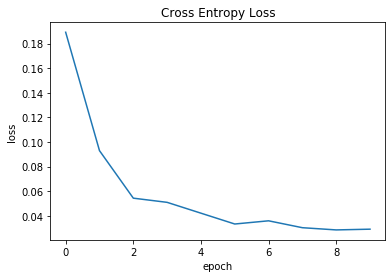

In [33]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path1 = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments/Assignments2/P1/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_1(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path1+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path1 + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Achitecture 2

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0'

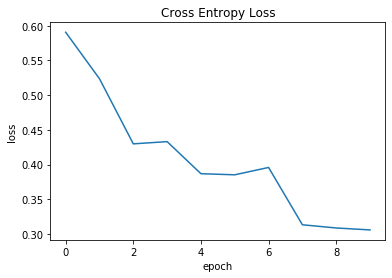

In [16]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path2 = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments/Assignments2/P2/'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_2(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path2+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path2 + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Architecture 3

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/output/W:0' shape=(200, 10) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/output/b:0' shape=(10,) dtype=float32_ref>
Instructions for updating:
Call initializer instance with the dtype argument i

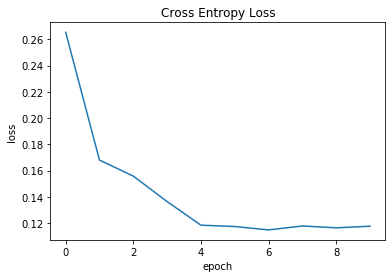

In [15]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_3(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Architecture 4

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0'

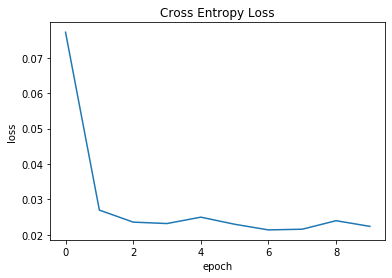

In [17]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_5(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Architecture 5

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0'

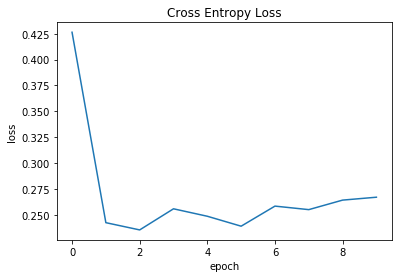

In [18]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_5(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Architecture 6

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0'

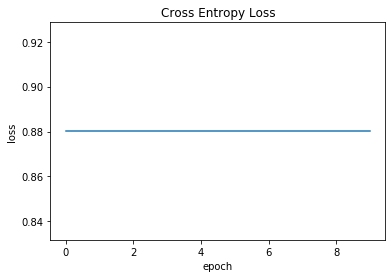

In [20]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_6(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(mnist.train.num_examples/batch_size)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = mnist.train.next_batch(batch_size)
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: mnist.test.images, y: mnist.test.labels})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
            # Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Number of parameters
#### (1) 
#### W=784* 200+200* 200* 5+200* 10=358800
#### b=200*6+10=1210
#### sum=W+b=360010
#### (2)sum=360010
#### (3)W=784* 200+200* 200* 3+200* 10=278800
#### b=200*4+10=810
#### sum=W+b=279610
#### (4)sum=279610
#### (5)sum=360010
#### (6)sum=360010

# P2

In [32]:
output_size = 10 # total classes (0-9 digits)
input_size =3072  # data features (img shape: 32*32*3).
# Training parameters.
learning_rate = 0.00005
training_epochs = 200
batch_size = 200
display_step = 10
# number of neurons

n_hidden_1 = 200
n_hidden_2 = 200
n_hidden_3 = 200
n_hidden_4 = 200
n_hidden_5 = 200
n_hidden_6 = 200

In [22]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

In [23]:
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

In [24]:
x_train, x_test = x_train.reshape([-1, input_size]), x_test.reshape([-1, input_size])

In [25]:
x_train, x_test = x_train / 255., x_test / 255. #normalize

In [26]:
def one_hot_encode(x):
    """
        argument
            - x: a list of labels
        return
            - one hot encoding matrix (number of labels, number of class)
    """
    encoded = np.zeros((len(x), 10))
    
    for idx, val in enumerate(x):
        encoded[idx][val] = 1
    
    return encoded

In [27]:
y_train=one_hot_encode(y_train)

In [28]:
y_test=one_hot_encode(y_test)

In [29]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,shuffle=True)

In [30]:
train_num=x_train.shape[0]

### Architecture 1

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(3072, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0

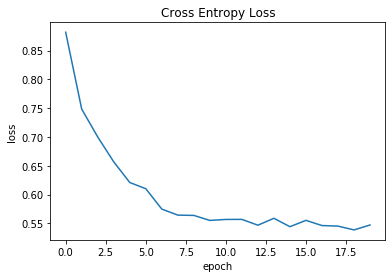

In [33]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_1(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(train_num/batch_size)
                perm=np.random.permutation(train_num)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = x_train[perm[i*batch_size:(i+1)*batch_size]],y_train[perm[i*batch_size:(i+1)*batch_size]]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: x_val, y: y_val})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
             #Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Architecture 2

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(3072, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0

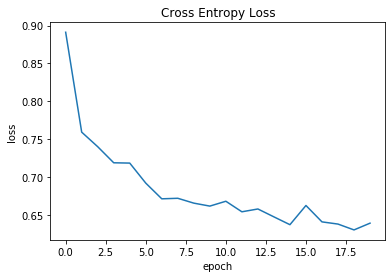

In [34]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_2(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(train_num/batch_size)
                perm=np.random.permutation(train_num)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = x_train[perm[i*batch_size:(i+1)*batch_size]],y_train[perm[i*batch_size:(i+1)*batch_size]]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: x_val, y: y_val})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
             #Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Architecture 3

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(3072, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/output/W:0' shape=(200, 10) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/output/b:0' shape=(10,) dtype=float32_ref>
Epoch: 000 cost function= 2.2120922  Validation Error: 0.7337999939918518
Epo

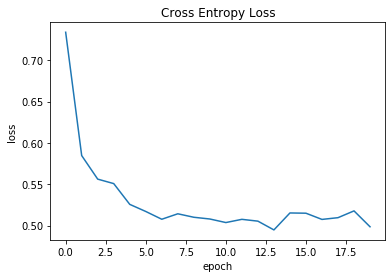

In [35]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_3(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(train_num/batch_size)
                perm=np.random.permutation(train_num)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = x_train[perm[i*batch_size:(i+1)*batch_size]],y_train[perm[i*batch_size:(i+1)*batch_size]]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: x_val, y: y_val})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
             #Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Architecture 4

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(3072, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/output/W:0' shape=(200, 10) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/output/b:0' shape=(10,) dtype=float32_ref>
Epoch: 000 cost function= 2.3405689  Validation Error: 0.9028000012040138
Epo

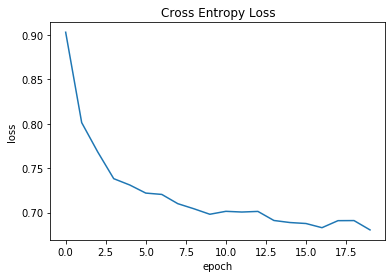

In [36]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_4(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(train_num/batch_size)
                perm=np.random.permutation(train_num)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = x_train[perm[i*batch_size:(i+1)*batch_size]],y_train[perm[i*batch_size:(i+1)*batch_size]]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: x_val, y: y_val})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
             #Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Architecture 5

In [ ]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_5(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(train_num/batch_size)
                perm=np.random.permutation(train_num)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = x_train[perm[i*batch_size:(i+1)*batch_size]],y_train[perm[i*batch_size:(i+1)*batch_size]]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: x_val, y: y_val})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
             #Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

Test Accuracy: 0.4619
Execution time (seconds) was 10799.166


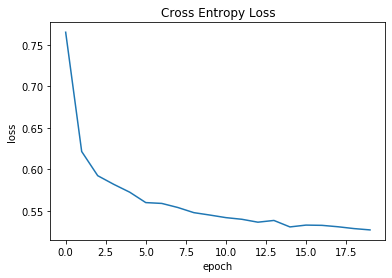

In [71]:
 accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
print("Test Accuracy:", accuracy)

elapsed_time = time.time() - start_time
print('Execution time (seconds) was %0.3f' % elapsed_time)

 #Visualization of the results
# loss function
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### Architecture 6

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(3072, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0

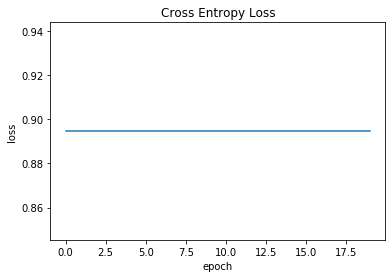

In [37]:
if __name__ == '__main__':
    
    start_time = time.time()
    #please, make sure you changed for your own path 
    log_files_path = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments'

    with tf.Graph().as_default():
        
        with tf.variable_scope("multi_layer"):
            #neural network definition 
            
            #the input variables are first define as placeholder 
            # a placeholder is a variable/data which will be assigned later 
            # image vector & label
            x = tf.placeholder("float", [None, input_size])   # MNIST data image of shape 28*28=784
            y = tf.placeholder("float", [None, output_size])  # 0-9 digits recognition

            #the network is defined using the inference function defined above in the code
            output = inference_6(x)

            cost = loss_2(output, y)
            
            #initialize the value of the global_step variable 
            # recall: it is incremented by one each time the .minimise() is called
            global_step = tf.Variable(0, name='global_step', trainable=False)
            
            train_op = training(cost, global_step)
            #train_op = training(cost, global_step=None)
            
            #evaluate the accuracy of the network (done on a validation set)
            eval_op = evaluate(output, y)

            summary_op = tf.summary.merge_all()
    
            #save and restore variables to and from checkpoints.
            saver = tf.train.Saver()
    
            #defines a session
            sess = tf.Session()
            
            # summary writer
            #https://www.tensorflow.org/api_docs/python/tf/summary/FileWriter
            #
            summary_writer = tf.summary.FileWriter(log_files_path+'multi_layer/', sess.graph)
        
            #initialization of all the variables
            init_op = tf.global_variables_initializer()
            sess.run(init_op)
        
            #will work with this later
            #saver.restore(sess, log_files_path+'multi_layer/model-checkpoint-66000')
            
            loss_trace = []

            # Training cycle
            for epoch in range(training_epochs):

                avg_cost = 0.
                total_batch = int(train_num/batch_size)
                perm=np.random.permutation(train_num)
    
                # Loop over all batches
                for i in range(total_batch):

                    minibatch_x, minibatch_y = x_train[perm[i*batch_size:(i+1)*batch_size]],y_train[perm[i*batch_size:(i+1)*batch_size]]
                    
                    # Fit training using batch data
                    #the training is done using the training dataset
                    sess.run(train_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    
                    # Compute average loss
                    avg_cost += sess.run(cost, feed_dict={x: minibatch_x, y: minibatch_y})/total_batch
                    
                # Display logs per epoch step
                if epoch % display_step == 0:
                    
                    #the accuracy is evaluated using the validation dataset
                    accuracy = sess.run(eval_op, feed_dict={x: x_val, y: y_val})
                    loss_trace.append(1-accuracy)    
                    print("Epoch:", '%03d' % epoch, "cost function=", "{:0.7f}".format(avg_cost), " Validation Error:", (1.0 - accuracy))
                    summary_str = sess.run(summary_op, feed_dict={x: minibatch_x, y: minibatch_y})
                    summary_writer.add_summary(summary_str, sess.run(global_step))
                        
                    #save to use later
                    #https://www.tensorflow.org/api_docs/python/tf/train/Saver
                    #saver.save(sess, log_files_path+'model-checkpoint', global_step=global_step)
                    saver.save(sess, log_files_path + 'multi_layer/model-checkpoint', global_step=global_step)
                        
            print("Optimization Finished!")
            #accuracy evaluated with the whole test dataset
            accuracy = sess.run(eval_op, feed_dict={x: x_test, y: y_test})
            print("Test Accuracy:", accuracy)
                    
            elapsed_time = time.time() - start_time
            print('Execution time (seconds) was %0.3f' % elapsed_time)
            
             #Visualization of the results
            # loss function
            plt.plot(loss_trace)
            plt.title('Cross Entropy Loss')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.show()

### Number of parameters
#### (1) 
#### W=3072* 200+200* 200* 5+200* 10=816400
#### b=200*6+10=1210
#### sum=W+b=817610
#### (2)sum=817610
#### (3)W=784* 200+200* 200* 3+200* 10=736400
#### b=200*4+10=810
#### sum=W+b=818420
#### (4)sum=818420
#### (5)sum=817610
#### (6)sum=817610

## Problem 3

### Architecture1

In [13]:
#the input variables are first define as placeholder 
# a placeholder is a variable/data which will be assigned later 
# image vector & label
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes
log_files_path1 = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments/Assignments2/P1/'
#defines a session
sess = tf.Session()


with tf.variable_scope("multi_layer", reuse=tf.AUTO_REUSE):
    #opt neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_opt = inference_1(x)
    
    #compute the cost 
    cost_opt = loss_2(output_opt, y)
    
    saver = tf.train.Saver() 
    
    var_list_opt = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b",
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "hidden_layer_5/W", "hidden_layer_5/b",
                    "hidden_layer_6/W", "hidden_layer_6/b",
                    "output/W", "output/b"]
    
    var_list_opt = [tf.get_variable(v) for v in var_list_opt]
    
    #restore values of parameters saved previously
    #remember to download the model checkpoints files from canvas and save them in the corresponding path
    saver.restore(sess, log_files_path1 + 'multi_layer/model-checkpoint-100100')

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0'

Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Mat

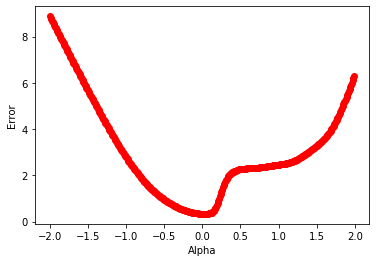

In [15]:
with tf.variable_scope("multi_layer_init", reuse=tf.AUTO_REUSE):
    #rand neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_rand = inference_1(x)
    #compute the rand cost
    cost_rand = loss_2(output_rand, y)
    
    var_list_rand =  ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b",
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "hidden_layer_5/W", "hidden_layer_5/b",
                    "hidden_layer_6/W", "hidden_layer_6/b",
                    "output/W", "output/b"]
    
    var_list_rand = [tf.get_variable(v) for v in var_list_rand]
    
    #initialization of the variables
    init_op = tf.variables_initializer(var_list_rand)
    
    sess.run(init_op)

    

#dictionary for the test dataset 
#used to evaluate accuracy 
feed_dict = {
        x: mnist.test.images,
        y: mnist.test.labels,
}






#compute the loss for opt and rand networks
print(sess.run([cost_opt, cost_rand], feed_dict=feed_dict))





with tf.variable_scope("multi_layer_inter") as scope:
    #initialize the placeholder alpha coefficient 
    #a placeholder is a variable/data which will be assigned later 
    alpha = tf.placeholder("float", [1, 1])
    
    #the coefficients of the opt and rand networks are modulated with the alpha coefficient
    h1_W_inter = var_list_opt[0] * (1.0 - alpha) + var_list_rand[0] * (alpha)
    h1_b_inter = var_list_opt[1] * (1.0 - alpha) + var_list_rand[1] * (alpha)
    #
    h2_W_inter = var_list_opt[2] * (1.0 - alpha) + var_list_rand[2] * (alpha)
    h2_b_inter = var_list_opt[3] * (1.0 - alpha) + var_list_rand[3] * (alpha)
    
    h3_W_inter = var_list_opt[4] * (1.0 - alpha) + var_list_rand[4] * (alpha)
    h3_b_inter = var_list_opt[5] * (1.0 - alpha) + var_list_rand[5] * (alpha)
    
    h4_W_inter = var_list_opt[6] * (1.0 - alpha) + var_list_rand[6] * (alpha)
    h4_b_inter = var_list_opt[7] * (1.0 - alpha) + var_list_rand[7] * (alpha)

    h5_W_inter = var_list_opt[8] * (1.0 - alpha) + var_list_rand[8] * (alpha)
    h5_b_inter = var_list_opt[9] * (1.0 - alpha) + var_list_rand[9] * (alpha)

    h6_W_inter = var_list_opt[10] * (1.0 - alpha) + var_list_rand[10] * (alpha)
    h6_b_inter = var_list_opt[11] * (1.0 - alpha) + var_list_rand[11] * (alpha)

    #
    o_W_inter  = var_list_opt[12] * (1.0 - alpha) + var_list_rand[12] * (alpha)
    o_b_inter  = var_list_opt[13] * (1.0 - alpha) + var_list_rand[13] * (alpha)
    
    h1_inter = tf.nn.sigmoid(tf.matmul(x,     h1_W_inter) + h1_b_inter)
    h2_inter = tf.nn.tanh(tf.matmul(h1_inter, h2_W_inter) + h2_b_inter)
    h3_inter = tf.nn.relu(tf.matmul(h2_inter, h3_W_inter) + h3_b_inter)
    h4_inter = tf.nn.sigmoid(tf.matmul(h3_inter, h4_W_inter) + h4_b_inter)
    h5_inter = tf.nn.leaky_relu(tf.matmul(h4_inter, h5_W_inter) + h5_b_inter)
    h6_inter = tf.nn.tanh(tf.matmul(h5_inter, h6_W_inter) + h6_b_inter)
    o_inter  = tf.nn.relu(tf.matmul(h6_inter, o_W_inter ) + o_b_inter)
    
    cost_inter = loss_2(o_inter, y)
    tf.summary.scalar("interpolated_cost", cost_inter)
       
#save the parameters for plotting in tensorboard
summary_writer = tf.summary.FileWriter(log_files_path1 + 'linear_interpolation_1/', sess.graph)
summary_op = tf.summary.merge_all()

#list to save the results of the following for loop
results = []
alphaMin = -2
alphaMax = 2
alphaStep = 0.01
for a in np.arange(alphaMin, alphaMax, alphaStep):
    #test data with different values of alpha coefficient
    feed_dict = {
            x: mnist.test.images,
            y: mnist.test.labels,
            alpha: [[a]],
            }
    #compute the loss for the different value of alpha
    [cost, summary_str] = sess.run([cost_inter, summary_op], feed_dict=feed_dict)
    summary_writer.add_summary(summary_str, (a + alphaMax)/alphaStep)
    results.append(cost)

plt.plot(np.arange(alphaMin, alphaMax, alphaStep), results, 'ro')
plt.ylabel('Error')
plt.xlabel('Alpha')
plt.show()

### Architecture2

In [13]:
#the input variables are first define as placeholder 
# a placeholder is a variable/data which will be assigned later 
# image vector & label
x = tf.placeholder("float", [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder("float", [None, 10]) # 0-9 digits recognition => 10 classes
log_files_path2 = 'C:/Users/nirun/Desktop/Columbia Courses/Deep Learning/Assignments/Assignments2/P2/'
#defines a session
sess = tf.Session()


with tf.variable_scope("multi_layer", reuse=tf.AUTO_REUSE):
    #opt neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_opt = inference_2(x)
    
    #compute the cost 
    cost_opt = loss_2(output_opt, y)
    
    saver = tf.train.Saver() 
    
    var_list_opt = ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b",
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "hidden_layer_5/W", "hidden_layer_5/b",
                    "hidden_layer_6/W", "hidden_layer_6/b",
                    "output/W", "output/b"]
    
    var_list_opt = [tf.get_variable(v) for v in var_list_opt]
    
    #restore values of parameters saved previously
    #remember to download the model checkpoints files from canvas and save them in the corresponding path
    saver.restore(sess, log_files_path2 + 'multi_layer/model-checkpoint-100100')

Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer/hidden_layer_6/W:0'

Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_1/W:0' shape=(784, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_1/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_2/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_2/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_3/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_3/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_4/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_4/b:0' shape=(200,) dtype=float32_ref>
Weight Matrix: <tf.Variable 'multi_layer_init/hidden_layer_5/W:0' shape=(200, 200) dtype=float32_ref>
Bias Vector: <tf.Variable 'multi_layer_init/hidden_layer_5/b:0' shape=(200,) dtype=float32_ref>
Weight Mat

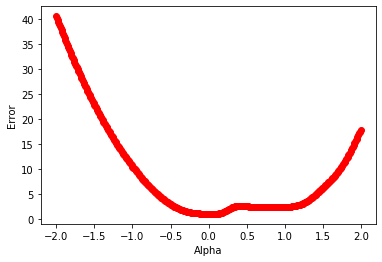

In [14]:
with tf.variable_scope("multi_layer_init", reuse=tf.AUTO_REUSE):
    #rand neural network definition
    
    #the network is defined using the inference function defined above in the code
    output_rand = inference_2(x)
    #compute the rand cost
    cost_rand = loss_2(output_rand, y)
    
    var_list_rand =  ["hidden_layer_1/W", "hidden_layer_1/b",
                    "hidden_layer_2/W", "hidden_layer_2/b", 
                    "hidden_layer_3/W", "hidden_layer_3/b",
                    "hidden_layer_4/W", "hidden_layer_4/b",
                    "hidden_layer_5/W", "hidden_layer_5/b",
                    "hidden_layer_6/W", "hidden_layer_6/b",
                    "output/W", "output/b"]
    
    var_list_rand = [tf.get_variable(v) for v in var_list_rand]
    
    #initialization of the variables
    init_op = tf.variables_initializer(var_list_rand)
    
    sess.run(init_op)

    

#dictionary for the test dataset 
#used to evaluate accuracy 
feed_dict = {
        x: mnist.test.images,
        y: mnist.test.labels,
}






#compute the loss for opt and rand networks
print(sess.run([cost_opt, cost_rand], feed_dict=feed_dict))





with tf.variable_scope("multi_layer_inter") as scope:
    #initialize the placeholder alpha coefficient 
    #a placeholder is a variable/data which will be assigned later 
    alpha = tf.placeholder("float", [1, 1])
    
    #the coefficients of the opt and rand networks are modulated with the alpha coefficient
    h1_W_inter = var_list_opt[0] * (1.0 - alpha) + var_list_rand[0] * (alpha)
    h1_b_inter = var_list_opt[1] * (1.0 - alpha) + var_list_rand[1] * (alpha)
    #
    h2_W_inter = var_list_opt[2] * (1.0 - alpha) + var_list_rand[2] * (alpha)
    h2_b_inter = var_list_opt[3] * (1.0 - alpha) + var_list_rand[3] * (alpha)
    
    h3_W_inter = var_list_opt[4] * (1.0 - alpha) + var_list_rand[4] * (alpha)
    h3_b_inter = var_list_opt[5] * (1.0 - alpha) + var_list_rand[5] * (alpha)
    
    h4_W_inter = var_list_opt[6] * (1.0 - alpha) + var_list_rand[6] * (alpha)
    h4_b_inter = var_list_opt[7] * (1.0 - alpha) + var_list_rand[7] * (alpha)

    h5_W_inter = var_list_opt[8] * (1.0 - alpha) + var_list_rand[8] * (alpha)
    h5_b_inter = var_list_opt[9] * (1.0 - alpha) + var_list_rand[9] * (alpha)

    h6_W_inter = var_list_opt[10] * (1.0 - alpha) + var_list_rand[10] * (alpha)
    h6_b_inter = var_list_opt[11] * (1.0 - alpha) + var_list_rand[11] * (alpha)

    #
    o_W_inter  = var_list_opt[12] * (1.0 - alpha) + var_list_rand[12] * (alpha)
    o_b_inter  = var_list_opt[13] * (1.0 - alpha) + var_list_rand[13] * (alpha)
    
    h1_inter = tf.nn.tanh(tf.matmul(x,     h1_W_inter) + h1_b_inter)
    h2_inter = tf.nn.sigmoid(tf.matmul(h1_inter, h2_W_inter) + h2_b_inter)
    h3_inter = tf.nn.sigmoid(tf.matmul(h2_inter, h3_W_inter) + h3_b_inter)
    h4_inter = tf.nn.relu(tf.matmul(h3_inter, h4_W_inter) + h4_b_inter)
    h5_inter = tf.nn.tanh(tf.matmul(h4_inter, h5_W_inter) + h5_b_inter)
    h6_inter = tf.nn.leaky_relu(tf.matmul(h5_inter, h6_W_inter) + h6_b_inter)
    o_inter  = tf.nn.relu(tf.matmul(h6_inter, o_W_inter ) + o_b_inter)
    
    cost_inter = loss_2(o_inter, y)
    tf.summary.scalar("interpolated_cost", cost_inter)
       
#save the parameters for plotting in tensorboard
summary_writer = tf.summary.FileWriter(log_files_path2 + 'linear_interpolation_1/', sess.graph)
summary_op = tf.summary.merge_all()

#list to save the results of the following for loop
results = []
alphaMin = -2
alphaMax = 2
alphaStep = 0.01
for a in np.arange(alphaMin, alphaMax, alphaStep):
    #test data with different values of alpha coefficient
    feed_dict = {
            x: mnist.test.images,
            y: mnist.test.labels,
            alpha: [[a]],
            }
    #compute the loss for the different value of alpha
    [cost, summary_str] = sess.run([cost_inter, summary_op], feed_dict=feed_dict)
    summary_writer.add_summary(summary_str, (a + alphaMax)/alphaStep)
    results.append(cost)

plt.plot(np.arange(alphaMin, alphaMax, alphaStep), results, 'ro')
plt.ylabel('Error')
plt.xlabel('Alpha')
plt.show()